In [4]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt

# Wie haben sich die Ausleihzahlen von EBOOKs im Vergleich zu BOOKs in den letzten zehn Jahren entwickelt?

## Step 1: Retrieve the datasets

In [5]:
# range(n, n-1) erzeugt eine sequenz von n bis n-1
# str() notwendig für concat von integer mit string, da datentypen angeglichen werden müssen
for i in range(2011,2021):
    url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=" + str(i) + "&$limit=10000"
    print("Retrieving: \t" + url)
    
    checkout_file = "checkout_" + str(i) + ".csv"
    print("Writing: \t" + checkout_file)
    
    urllib.request.urlretrieve(url, checkout_file)
    print("Done\n")

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2011&$limit=10000
Writing: 	checkout_2011.csv
Done

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2012&$limit=10000
Writing: 	checkout_2012.csv
Done

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2013&$limit=10000
Writing: 	checkout_2013.csv
Done

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2014&$limit=10000
Writing: 	checkout_2014.csv
Done

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2015&$limit=10000
Writing: 	checkout_2015.csv
Done

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2016&$limit=10000
Writing: 	checkout_2016.csv
Done

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2017&$limit=10000
Writing: 	checkout_2017.csv
Done

Retrieving: 	https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=c

## Step 2: Transform into dataframe

In [6]:
# leeren Dataframe erzeugen
checkouts_df = pd.DataFrame()

# gehe über alle Datasets und vereine sie in ein großes Dataframe
for i in range(2011,2021):
    checkout_file = "checkout_" + str(i) + ".csv"
    
    # temporäres Dataframe aus Dataset erzeugen
    print("Generating dataframe for: \t" + checkout_file)
    temp_df = pd.read_csv(checkout_file)
    
    
    # jedes temporäre Dataframe wird an das Gesamt-Dataframe drangehängt
    print("Add " + str(len(temp_df)) + " rows to aggregated dataframe")
    checkouts_df = pd.concat([checkouts_df,temp_df])
    
    print("Done\n")
    
print("Aggregated Dataframe has " + str(len(checkouts_df)) + " rows")

Generating dataframe for: 	checkout_2011.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2012.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2013.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2014.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2015.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2016.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2017.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2018.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2019.csv
Add 10000 rows to aggregated dataframe
Done

Generating dataframe for: 	checkout_2020.csv
Add 10000 rows to aggregated dataframe
Done

Aggregated Dataframe has 100000 rows


In [7]:
checkouts_df

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,SOUNDDISC,2011,1,1,Rosenkavalier,NaN,NaN,NaN,NaN
1,Digital,Freegal,SONG,2011,7,1,Close Enough To Perfect,Alabama,NaN,NaN,NaN
2,Physical,Horizon,BOOK,2011,6,1,Set in stone,NaN,"Family problems Fiction, Secrets Fiction, Iden...",NaN,NaN
3,Digital,Freegal,SONG,2011,1,1,Your Love (Acoustic),The Outfield,NaN,NaN,NaN
4,Physical,Horizon,SOUNDDISC,2011,1,1,Last date,NaN,Jazz 1961 1970,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9995,Physical,Horizon,BOOK,2020,1,1,A rebel heart / Beth White.,"White, Beth, 1957-","Man woman relationships Fiction, Women plantat...","Revell, a division of Baker Publishing Group,",[2018]
9996,Physical,Horizon,BOOK,2020,1,1,Discover Scotland / this edition written and r...,"Wilson, Neil, 1959-",Scotland Guidebooks,"Lonely Planet,",2013.
9997,Physical,Horizon,BOOK,2020,1,1,The wolves / Alex Berenson.,"Berenson, Alex","Wells John Fictitious character Fiction, Unite...","G.P. Putnam's Sons,",[2016]
9998,Digital,OverDrive,AUDIOBOOK,2020,1,2,The Healing Code: 6 Minutes to Heal the Source...,Alexander Loyd,"Medical, New Age, Nonfiction",Hachette Audio,2011


## Step 3: Visualize

<AxesSubplot:xlabel='checkoutyear'>

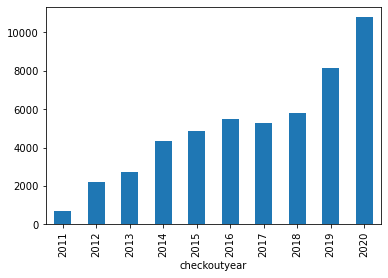

In [8]:
checkouts_ebook_df = checkouts_df[checkouts_df["materialtype"] == "EBOOK"]
checkouts_ebook_final_df = checkouts_ebook_df.groupby(by="checkoutyear").sum()
checkouts_ebook_final_df["checkouts"].plot(kind="bar")

<AxesSubplot:xlabel='checkoutyear'>

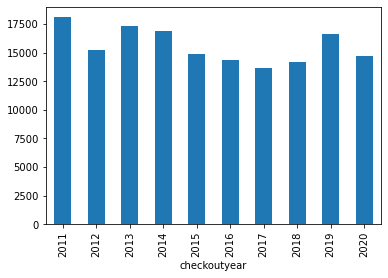

In [29]:
checkouts_book_df = checkouts_df[checkouts_df["materialtype"] == "BOOK"]
checkouts_book_final_df = checkouts_book_df.groupby(by="checkoutyear").sum()
checkouts_book_final_df["checkouts"].plot(kind="bar")

## Extra-Step 4: Lets look at all materialtypes at once ;-)

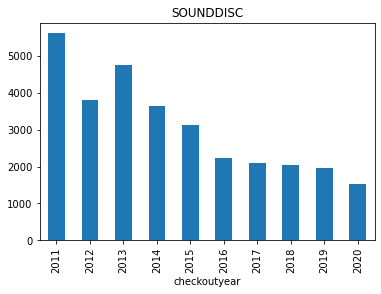

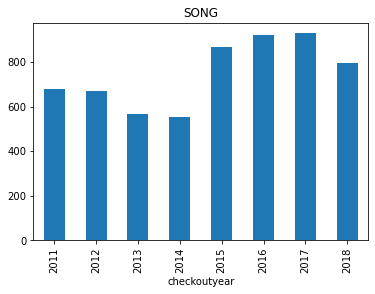

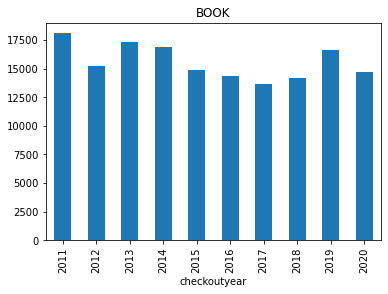

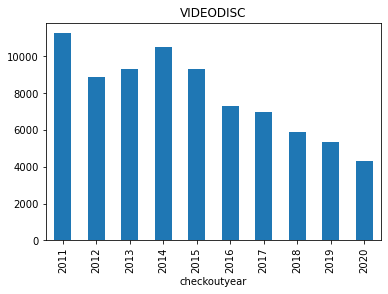

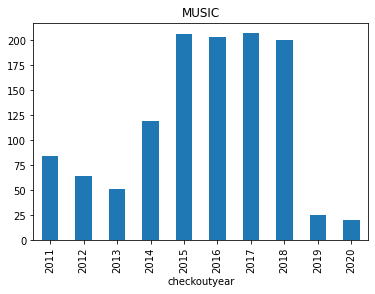

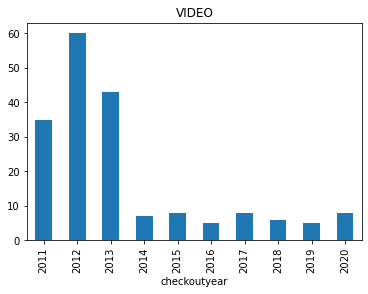

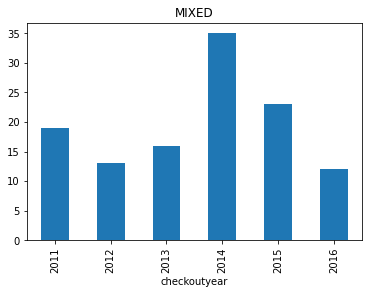

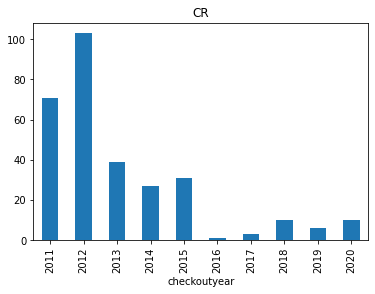

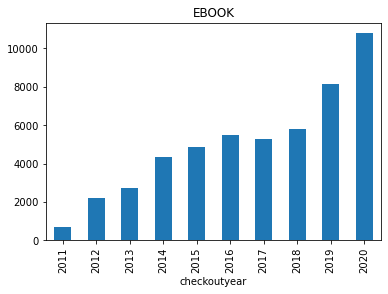

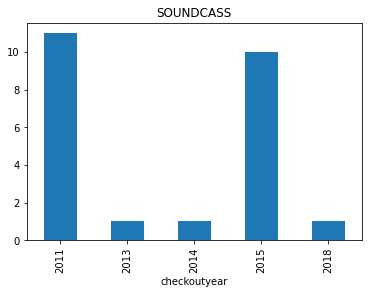

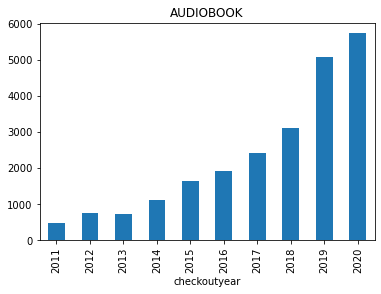

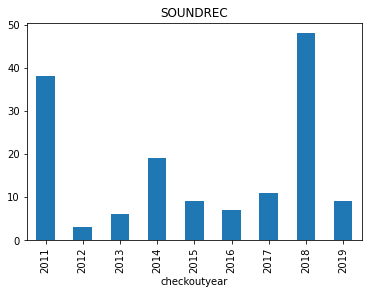

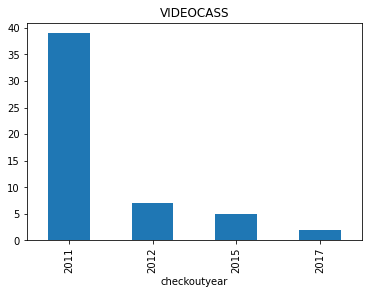

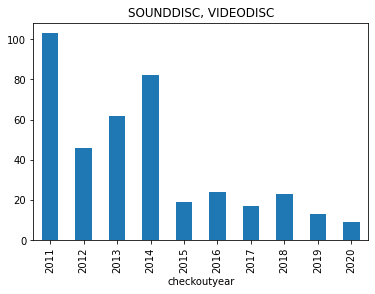

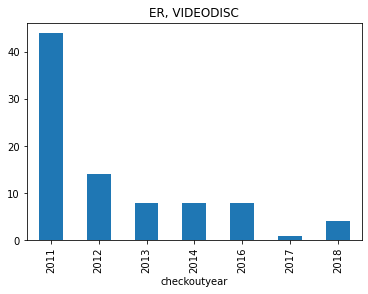

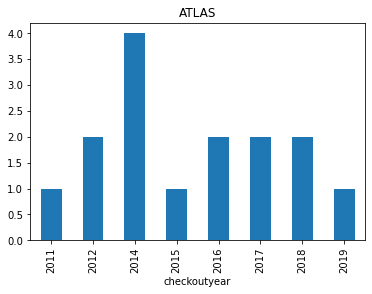

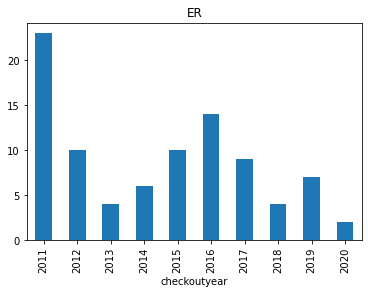

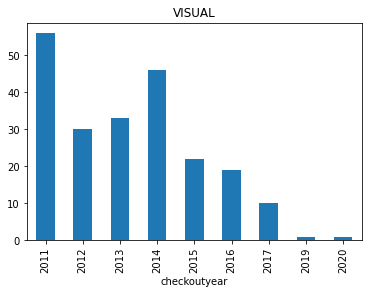

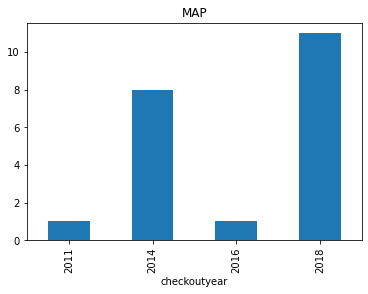

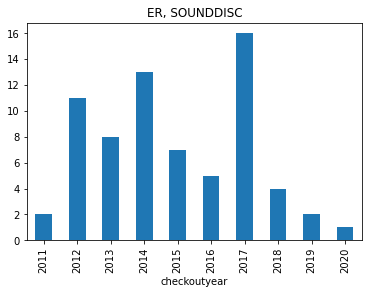

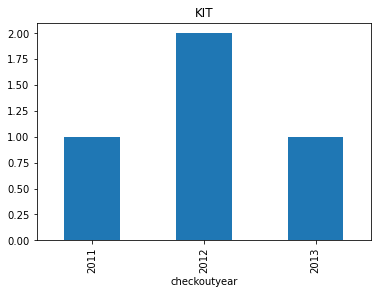

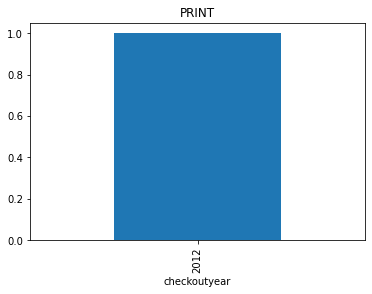

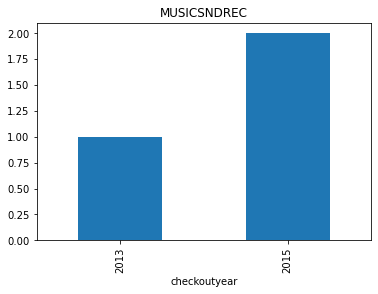

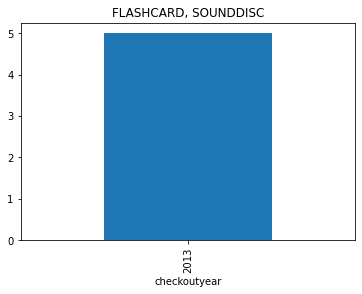

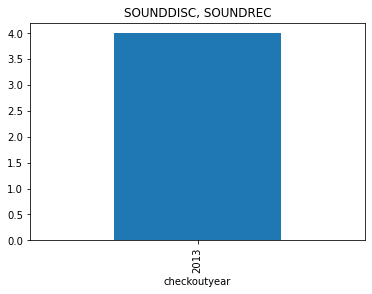

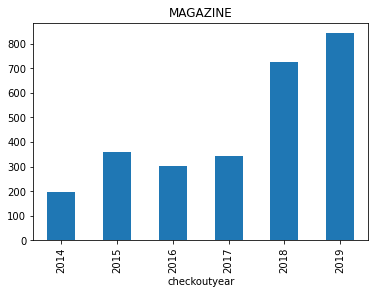

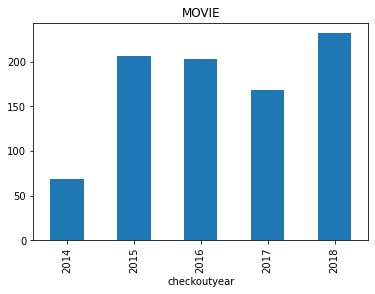

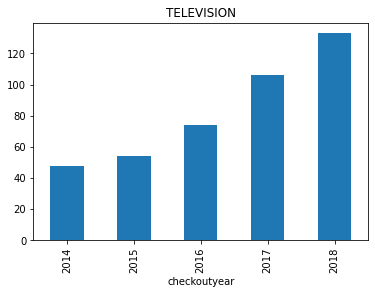

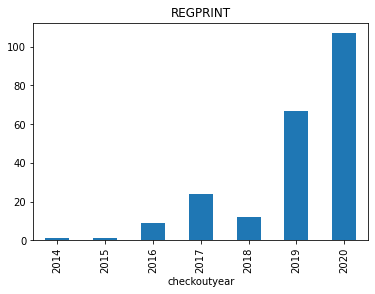

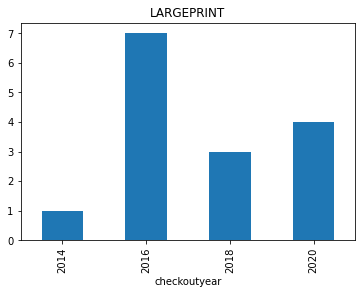

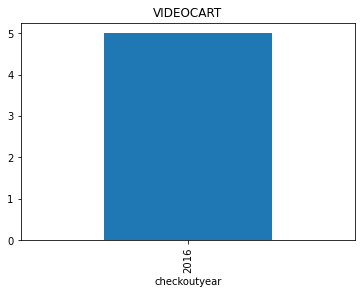

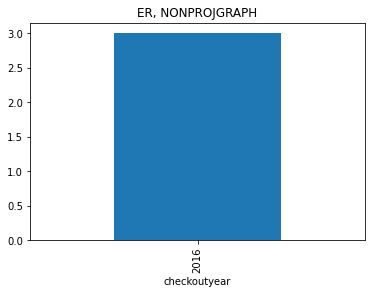

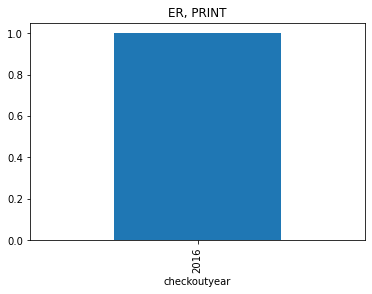

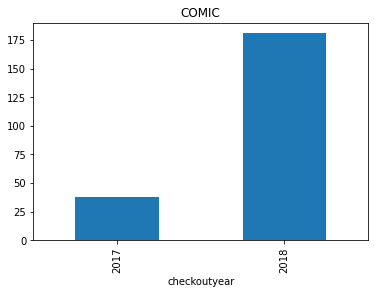

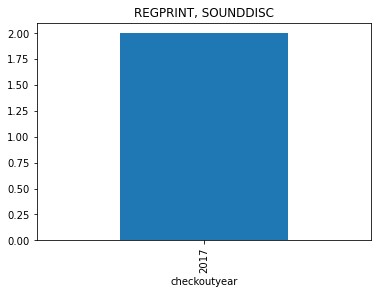

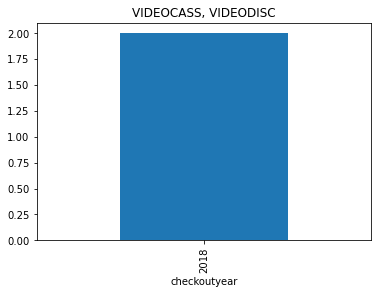

In [30]:
%matplotlib inline

# ermittle alle materialtypen
materialtype_list = checkouts_df["materialtype"].unique()

# gehe in schleife durch alle materialtypen
for materialtype in materialtype_list:
    # filtere aus Dataframe nur den aktuellen materialtyp und mach die selbe Magie wie oben
    checkouts_materialtype_df = checkouts_df[checkouts_df["materialtype"] == materialtype]
    checkouts_materialtype_final_df = checkouts_materialtype_df.groupby(by="checkoutyear").sum()
    checkouts_materialtype_final_df["checkouts"].plot(kind="bar")
    
    # zeige sofort den Plot inklusive Titel
    plt.title(materialtype)
    plt.show()

# Lösung 2: TOP-X Titel

TOP 5 EBOOKs aus 2011

	- TOP 1: The Lady Most Likely...: A Novel in Three Parts
	- TOP 2: Dead or Alive: Jack Ryan Series, Book 13
	- TOP 3: Breaking Dawn: The Twilight Saga, Book 4
	- TOP 4: Bitten: Women of the Otherworld Series, Book 1
	- TOP 5: The Graveyard Book




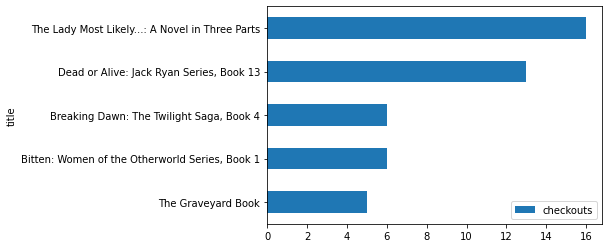

TOP 5 EBOOKs aus 2012

	- TOP 1: Zone One: A Novel
	- TOP 2: Outliers: The Story of Success
	- TOP 3: The Tipping Point: How Little Things Can Make a Big Difference
	- TOP 4: Never Love a Highlander: Highlander Series, Book 3
	- TOP 5: The Good Rain: Across Time and Terrain in the Pacific Northwest




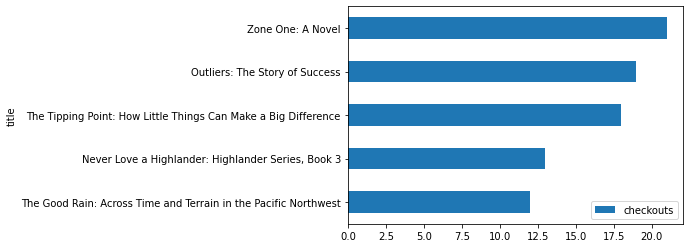

TOP 5 EBOOKs aus 2013

	- TOP 1: Cloud Atlas: A Novel
	- TOP 2: Behind the Beautiful Forevers: Life, death, and hope in a Mumbai undercity
	- TOP 3: A Dance with Dragons: A Song of Ice and Fire Series, Book 5
	- TOP 4: A Wanted Man: Jack Reacher Series, Book 17
	- TOP 5: The Lincoln Lawyer: Mickey Haller Series, Book 1




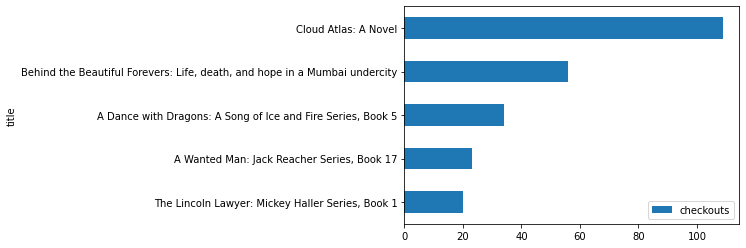

TOP 5 EBOOKs aus 2014

	- TOP 1: The Book Thief
	- TOP 2: Where'd You Go, Bernadette: A Novel
	- TOP 3: The Tiger's Wife: A Novel
	- TOP 4: The Girl with the Dragon Tattoo: Millennium Trilogy, Book 1
	- TOP 5: Behind the Beautiful Forevers: Life, death, and hope in a Mumbai undercity




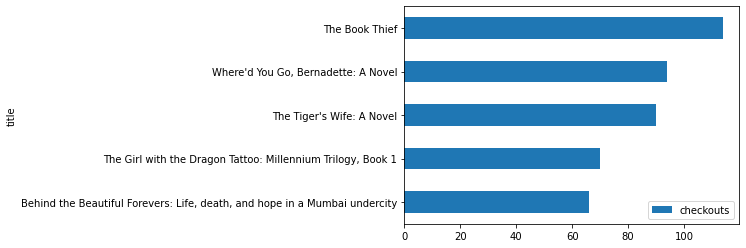

TOP 5 EBOOKs aus 2015

	- TOP 1: Cloud Atlas: A Novel
	- TOP 2: Life After Life: Todd Family Series, Book 1
	- TOP 3: The Girl on the Train: A Novel
	- TOP 4: Orange Is the New Black: My Year in a Women's Prison
	- TOP 5: The Husband's Secret




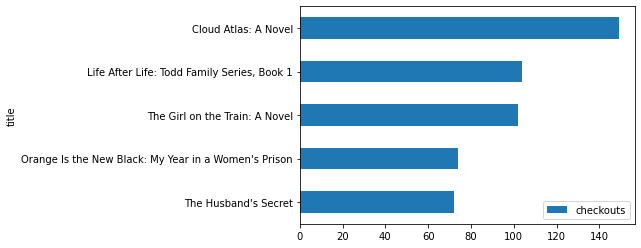

TOP 5 EBOOKs aus 2016

	- TOP 1: All the Light We Cannot See: A Novel
	- TOP 2: Fates and Furies: A Novel
	- TOP 3: Commonwealth
	- TOP 4: The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics
	- TOP 5: The Silkworm: Cormoran Strike Series, Book 2




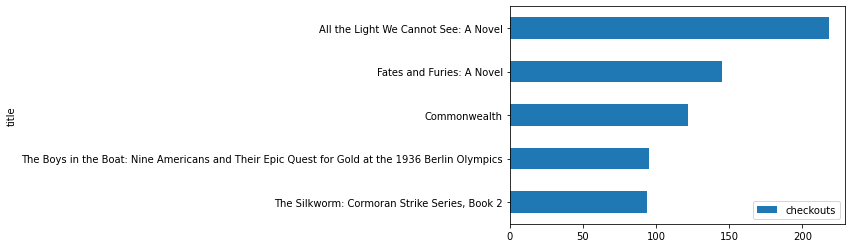

TOP 5 EBOOKs aus 2017

	- TOP 1: The Girl with the Lower Back Tattoo
	- TOP 2: The Trespasser: Dublin Murder Squad Series, Book 6
	- TOP 3: Eligible: A Modern Retelling of Pride and Prejudice
	- TOP 4: Go Set a Watchman: To Kill a Mockingbird Series, Book 2
	- TOP 5: Seveneves: A Novel




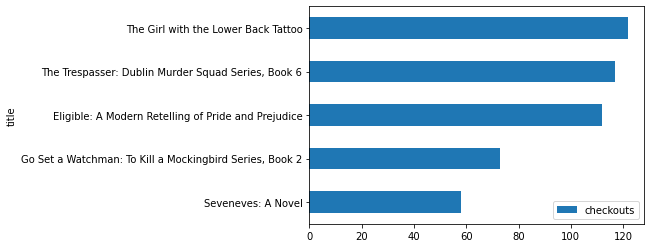

TOP 5 EBOOKs aus 2018

	- TOP 1: The Fifth Season: Broken Earth Series, Book 1
	- TOP 2: Shrill: Notes from a Loud Woman
	- TOP 3: Wonder
	- TOP 4: Beartown: A Novel
	- TOP 5: Gray Mountain: A Novel




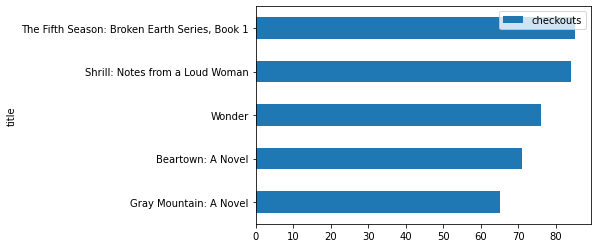

TOP 5 EBOOKs aus 2019

	- TOP 1: China Rich Girlfriend: Crazy Rich Asians Series, Book 2
	- TOP 2: Two Kinds of Truth: Harry Bosch Series, Book 20
	- TOP 3: The Rooster Bar
	- TOP 4: Station Eleven: A novel
	- TOP 5: Before We Were Yours: A Novel




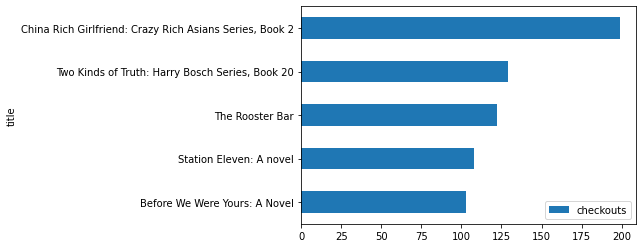

TOP 5 EBOOKs aus 2020

	- TOP 1: Where the Crawdads Sing
	- TOP 2: Little Fires Everywhere: A Novel
	- TOP 3: Between the World and Me
	- TOP 4: Circe
	- TOP 5: The Guardians: A Novel




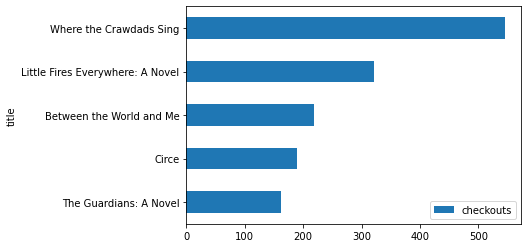

------------------------------------------------------------------

TOP 5 BOOKs aus 2011

	- TOP 1: Room : a novel / Emma Donoghue.
	- TOP 2: One day / David Nicholls.
	- TOP 3: Autobiography of Mark Twain. Volume 1 / Harriet Elinor Smith, editor ; associate editors: Benjamin Griffin ... [and others].
	- TOP 4: Our kind of traitor / John le Carré.
	- TOP 5: Bob books fun! / by Bobby Lynn Maslen ; pictures by John R. Maslen.




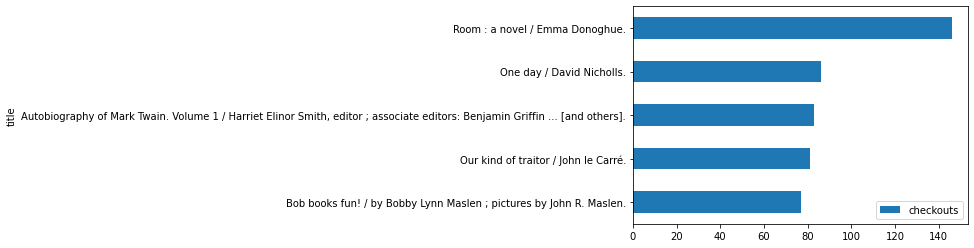

TOP 5 BOOKs aus 2012

	- TOP 1: Bossypants / Tina Fey.
	- TOP 2: Go, dog, go!
	- TOP 3: Uncataloged Folder or Bag--MAG
	- TOP 4: The book thief / by Markus Zusak.
	- TOP 5: Sister : a novel / Rosamund Lupton.




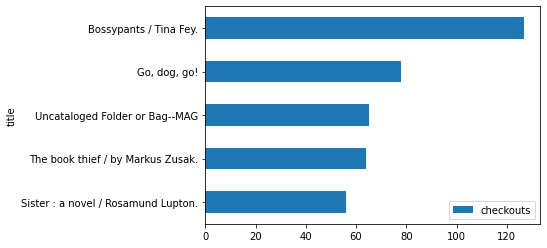

TOP 5 BOOKs aus 2013

	- TOP 1: Gone girl : a novel / Gillian Flynn.
	- TOP 2: The fault in our stars / John Green.
	- TOP 3: Uncataloged Folder or Bag--GWD
	- TOP 4: Are you ready to play outside? / by Mo Willems.
	- TOP 5: Dear life : stories / Alice Munro.




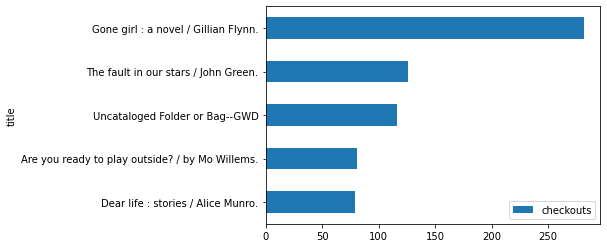

TOP 5 BOOKs aus 2014

	- TOP 1: The Circle : a novel / Dave Eggers.
	- TOP 2: Lean in : women, work, and the will to lead / Sheryl Sandberg ; with Nell Scovell.
	- TOP 3: The orchardist : a novel / Amanda Coplin.
	- TOP 4: Going clear : Scientology, Hollywood, and the prison of belief / Lawrence Wright.
	- TOP 5: Americanah / Chimamanda Ngozi Adichie.




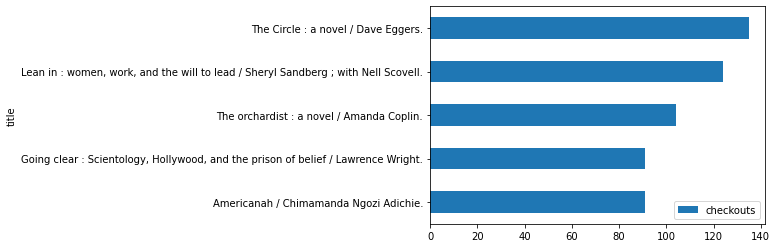

TOP 5 BOOKs aus 2015

	- TOP 1: Pigs make me sneeze! / by Mo Willems.
	- TOP 2: Personal / Lee Child.
	- TOP 3: I will surprise my friend! / by Mo Willems.
	- TOP 4: Shoo, Fly Guy! / Tedd Arnold.
	- TOP 5: Waiting is not easy! / by Mo Willems.




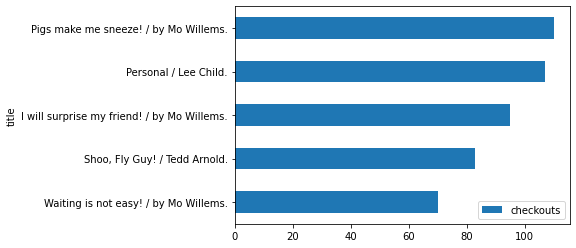

TOP 5 BOOKs aus 2016

	- TOP 1: All the light we cannot see : a novel / Anthony Doerr.
	- TOP 2: My brilliant friend : childhood, adolescence / Elena Ferrante ; translated from the Italian by Ann Goldstein.
	- TOP 3: Being mortal : medicine and what matters in the end / Atul Gawande.
	- TOP 4: Vinegar girl : The taming of the shrew retold / Anne Tyler.
	- TOP 5: The summer before the war : a novel / Helen Simonson.




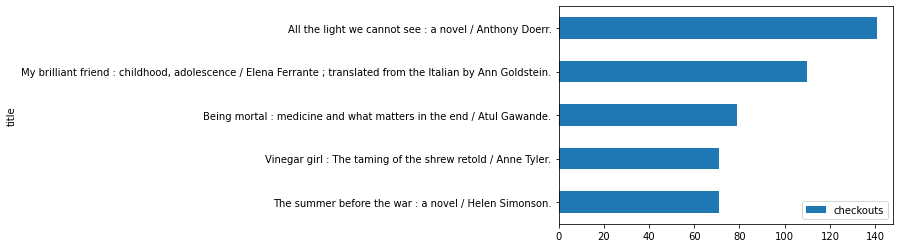

TOP 5 BOOKs aus 2017

	- TOP 1: Uncataloged Folder or Bag--SWT
	- TOP 2: Razor girl / Carl Hiaasen.
	- TOP 3: El deafo / Cece Bell ; color by David Lasky.
	- TOP 4: Hooray for Fly Guy! / Tedd Arnold.
	- TOP 5: I will take a nap! / by Mo Willems.




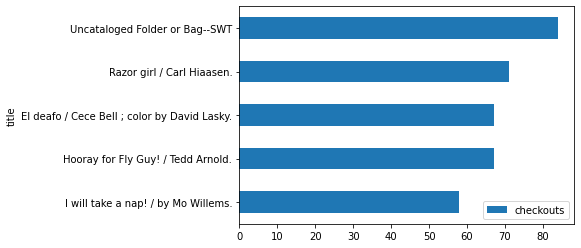

TOP 5 BOOKs aus 2018

	- TOP 1: In the midst of winter : a novel / Isabel Allende ; translated by Nick Castor and Amanda Hopkinson.
	- TOP 2: Her body and other parties : stories / Carmen Maria Machado.
	- TOP 3: George & Lizzie : a novel / Nancy Pearl.
	- TOP 4: Leonardo da Vinci / Walter Isaacson.
	- TOP 5: I'm a frog! / by Mo Willems.




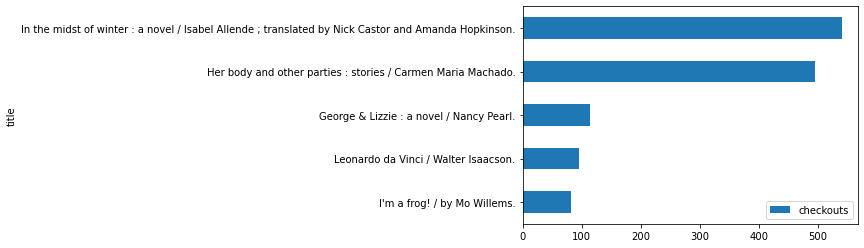

TOP 5 BOOKs aus 2019

	- TOP 1: Less : a novel / Andrew Sean Greer.
	- TOP 2: Warlight / Michael Ondaatje.
	- TOP 3: Spinning silver / Naomi Novik.
	- TOP 4: The white darkness / David Grann.
	- TOP 5: An American marriage / a novel by Tayari Jones.




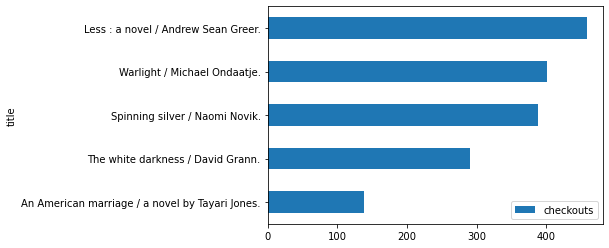

TOP 5 BOOKs aus 2020

	- TOP 1: Exhalation / Ted Chiang.
	- TOP 2: The night fire / Michael Connelly.
	- TOP 3: Ghosts / Raina Telgemeier ; with color by Braden Lamb.
	- TOP 4: The library book / Susan Orlean.
	- TOP 5: The snowy day.




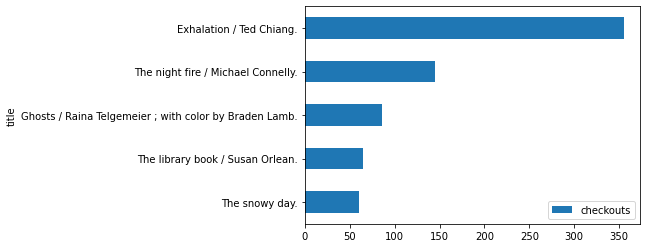

------------------------------------------------------------------

TOP 5 AUDIOBOOKs aus 2011

	- TOP 1: Catching Fire: The Hunger Games Series, Book 2 (unabridged) (Unabridged)
	- TOP 2: Broken for You (Unabridged)
	- TOP 3: Animal Farm (Unabridged)
	- TOP 4: The Amber Spyglass: His Dark Materials Series, Book 3 (unabridged) (Unabridged)
	- TOP 5: Tangled Reins: Regency Series, Book 1 (unabridged) (Unabridged)




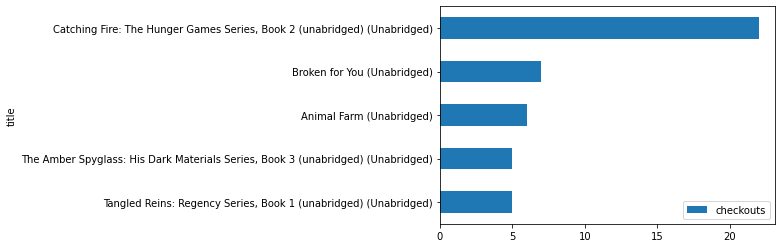

TOP 5 AUDIOBOOKs aus 2012

	- TOP 1: Bossypants (Unabridged)
	- TOP 2: The 4-Hour Workweek: Escape 9-5, Live Anywhere, and Join the New Rich (unabridged) (Unabridged)
	- TOP 3: The Affair: Jack Reacher Series, Book 16 (unabridged) (Unabridged)
	- TOP 4: Flight (Unabridged)
	- TOP 5: Natural Awareness (Unabridged)




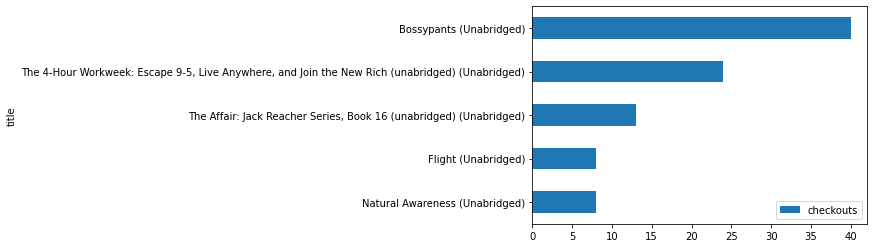

TOP 5 AUDIOBOOKs aus 2013

	- TOP 1: 1984 (Unabridged)
	- TOP 2: Trapped: The Iron Druid Chronicles, Book 5 (unabridged) (Unabridged)
	- TOP 3: Caleb's Crossing: A Novel (unabridged) (Unabridged)
	- TOP 4: The Now Habit: A Strategic Program for Overcoming Procrastination and Enjoying Guilt-Free Play (unabridged) (Unabridged)
	- TOP 5: The Painted Veil (Unabridged)




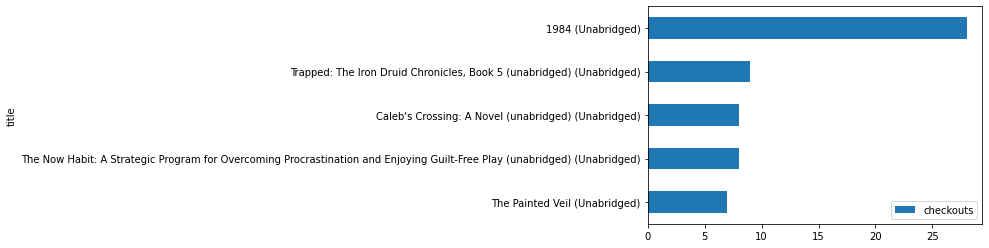

TOP 5 AUDIOBOOKs aus 2014

	- TOP 1: Bad Monkey (Unabridged)
	- TOP 2: Tart: Delicious Series, Book 2 (unabridged) (Unabridged)
	- TOP 3: Hotel on the Corner of Bitter and Sweet: A Novel (unabridged) (Unabridged)
	- TOP 4: The House of Hades: The Heroes of Olympus Series, Book 4 (unabridged) (Unabridged)
	- TOP 5: The Host: A Novel (unabridged) (Unabridged)




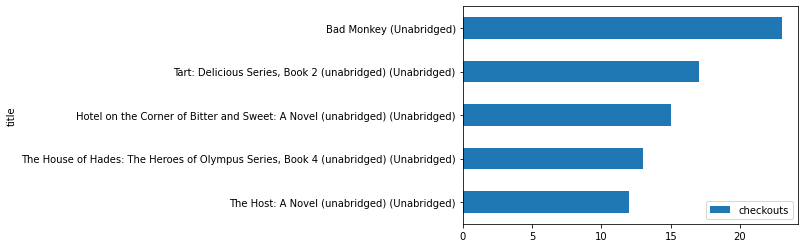

TOP 5 AUDIOBOOKs aus 2015

	- TOP 1: The Hunger Games: The Hunger Games Series, Book 1 (unabridged) (Unabridged)
	- TOP 2: Catching Fire: The Hunger Games Series, Book 2 (unabridged) (Unabridged)
	- TOP 3: Life After Life: Todd Family Series, Book 1 (unabridged) (Unabridged)
	- TOP 4: Takedown Twenty: Stephanie Plum Series, Book 20 (unabridged) (Unabridged)
	- TOP 5: Think Like a Freak: The Authors of Freakonomics Offer to Retrain Your Brain (unabridged) (Unabridged)




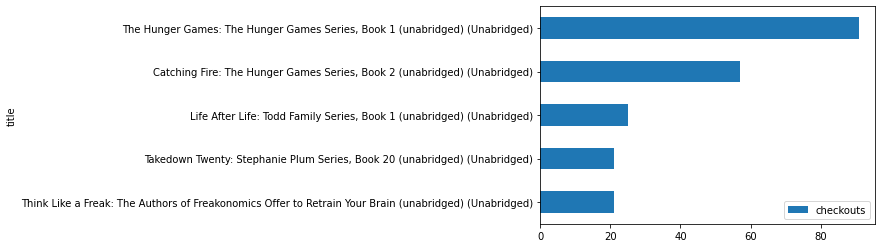

TOP 5 AUDIOBOOKs aus 2016

	- TOP 1: The Burning Room: Harry Bosch Series, Book 19 (unabridged) (Unabridged)
	- TOP 2: Memory Man: Amos Decker Series, Book 1 (unabridged) (Unabridged)
	- TOP 3: Catching Fire: The Hunger Games Series, Book 2 (unabridged) (Unabridged)
	- TOP 4: At the Water's Edge: A Novel (unabridged) (Unabridged)
	- TOP 5: Everything I Never Told You (Unabridged)




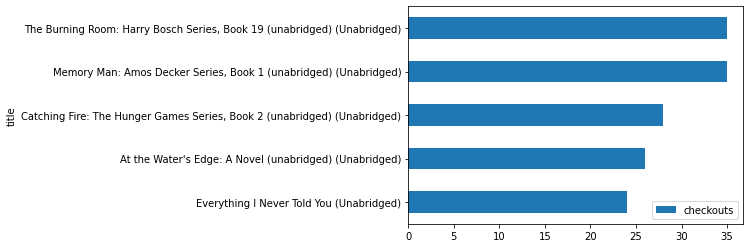

TOP 5 AUDIOBOOKs aus 2017

	- TOP 1: Me Before You: Me Before You Series, Book 1 (unabridged) (Unabridged)
	- TOP 2: The Trespasser: A Novel (unabridged) (Unabridged)
	- TOP 3: The Power of Habit: Why We Do What We Do in Life and Business (unabridged) (Unabridged)
	- TOP 4: Divergent: Divergent Trilogy, Book 1 (unabridged) (Unabridged)
	- TOP 5: The Alchemist (Unabridged)




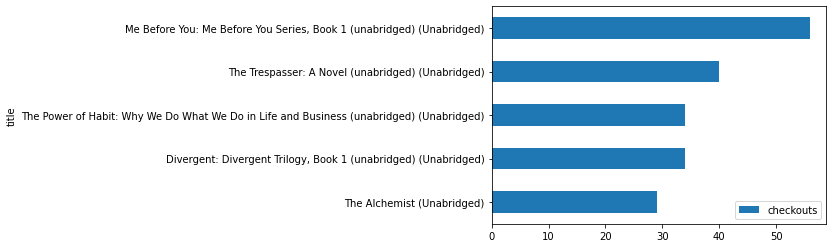

TOP 5 AUDIOBOOKs aus 2018

	- TOP 1: The Underground Railroad (Oprah's Book Club): A Novel (unabridged) (Unabridged)
	- TOP 2: Into the Water: A Novel (unabridged) (Unabridged)
	- TOP 3: Where'd You Go, Bernadette: A Novel (unabridged) (Unabridged)
	- TOP 4: The Woman in Cabin 10 (Unabridged)
	- TOP 5: Before We Were Yours: A Novel (unabridged) (Unabridged)




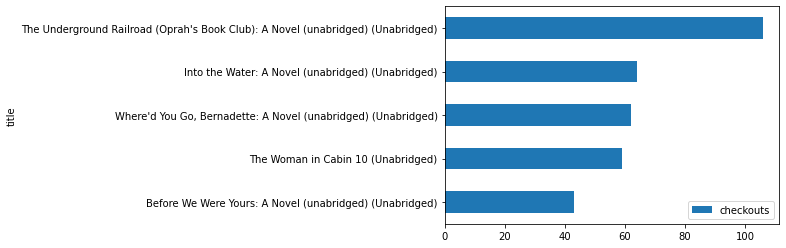

TOP 5 AUDIOBOOKs aus 2019

	- TOP 1: You Are a Badass: How to Stop Doubting Your Greatness and Start Living an Awesome Life (unabridged) (Unabridged)
	- TOP 2: The Witch Elm: A Novel (unabridged) (Unabridged)
	- TOP 3: The Great Alone: A Novel (unabridged) (Unabridged)
	- TOP 4: The Seven Principles for Making Marriage Work (Unabridged)
	- TOP 5: Big Little Lies (Unabridged)




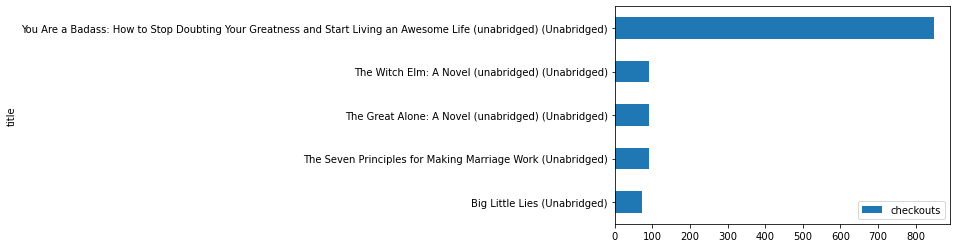

TOP 5 AUDIOBOOKs aus 2020

	- TOP 1: The Hunger Games: The Hunger Games Series, Book 1 (unabridged) (Unabridged)
	- TOP 2: Gone Girl: A Novel (unabridged) (Unabridged)
	- TOP 3: Good Omens: The Nice and Accurate Prophecies of Agnes Nutter, Witch (unabridged) (Unabridged)
	- TOP 4: Stay Sexy & Don't Get Murdered: The Definitive How-To Guide (unabridged) (Unabridged)
	- TOP 5: The Nightingale: A Novel (unabridged) (Unabridged)




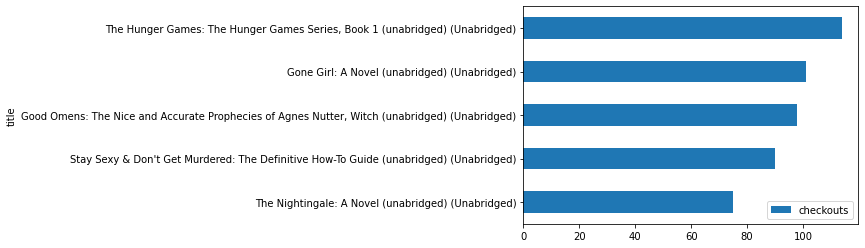

------------------------------------------------------------------



In [139]:
# Wie viele TOP?
top = 5
# Welche Materialtypen? -> Achtung, muss vollständigen Zeitraum abdecken, damit's funktioniert
materialtype_top_list = ["EBOOK", "BOOK", "AUDIOBOOK"]

# gehe durch alle vorgegebenen Materialtypen
for materialtype in materialtype_top_list:
    # gehe durch alle Jahre
    for year in range(2011,2021):
        print("TOP " + str(top) + " " + materialtype + "s aus " + str(year) + "\n")
        #
        checkouts_temp_df = checkouts_df[(checkouts_df["checkoutyear"] == year) & (checkouts_df["materialtype"] == materialtype)].sort_values("checkouts", ascending=False).head(top)
        # liste die TOP-X Titel auf
        for i in range(0,top):
            print("\t- TOP " + str(i+1) + ": " + checkouts_temp_df["title"].iloc[i])
        print("\n")
        
        checkouts_temp_df.plot.barh(x="title", y="checkouts").invert_yaxis()
        plt.show()
    print("------------------------------------------------------------------\n")